In [70]:
import time
import threading
import matplotlib.pyplot as plt
%matplotlib inline
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [136]:
class Philosopher(threading.Thread):
    def __init__(self, name, both_forks):
        """
        both_forks = [1, 2]
        """
        super().__init__()
        self.name = name
        self.both_forks = both_forks #食事に必要なフォーク番号
        self.hold_forks = [] #現時点で持っているフォーク番号
        self.state = 0 
        self.time_series = {} #{state: time, }
        """
        self.state: 現在の状況
        0: hold noting(hungry)   
        1:pickup1, 
        2:pickup2(eating), 
        3:puts1, 
        4:puts2(thinking)
        """
        
    def do_fork(self, Forks):
        if self.state == 0:
            #######はじめにどちらのフォークを持つか##########
#             wait_fork = random.choice(self.both_forks) #ランダム
            wait_fork = self.both_forks[0] #左から取る
#             wait_fork = self.both_forks[1] #右から取る
            ###################################
        
            need_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 1
            return need_time
            
        elif self.state == 1:
            wait_fork = list(set(self.both_forks) - set(self.hold_forks))[0]

            need_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 2
            return need_time
            
        elif self.state == 2:
            #######始めにどちらのフォークを置くか##########
#             put_fork = random.choice(self.hold_forks) #ランダム
#             put_fork = self.both_forks[0] #左から置く
            put_fork = self.both_forks[1] #右から置く
            ###################################
            
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            self.state = 3
            event.set()
            
        elif self.state == 3: #食事終了
            put_fork = self.hold_forks[0]
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            event.set()
            self.state = 4
            
        
    def action(self, Forks):
        for i in range(10):
            
            #self.state == 0:
            t = random.random() 
            print("trial {}: {} stays hungry for {:.3f}sec.".format(i, self.name, t))
            wait_time(t)
            self.time_series[str(i)+":hungry"]= t
            self.time_series[str(i)+":fork1"]= self.do_fork(Forks) #fork1: フォーク1を持つまでの時間
            
            #self.state == 1:
            self.time_series[str(i)+":fork2"]= self.do_fork(Forks) #"fork2":フォーク2を持つまでの時間

            #self.state == 2:
            t = random.random() 
            print("{} starts eating for {:.3f}sec.".format(self.name, t))
            wait_time(t)
            self.time_series[str(i)+":eating"]= t
            self.do_fork(Forks) #フォークを置く(1st)

            #self.state == 3:
            self.do_fork(Forks) #フォークを置く(2nd)
                
            #self.state == 4:
            t = random.random() 
            print("{} starts thinking for {:.3f}sec.".format(self.name, t))
            wait_time(t)
            self.state = 0
            self.time_series[str(i)+":thinking"]= t
            

In [137]:
def wait_time(t):
    time.sleep(t)

In [138]:
def put_forks(fork_num, Forks_class, hold_forks, name):
    Forks_class.change_state(fork_num)
    print("{} puts {}.".format(name,fork_num))
#     print("hold_forks", hold_forks)
    hold_forks.remove(fork_num)
    event.set()

In [139]:
def get_forks(fork_num, Forks_class, hold_forks, name):
    start_time = time.time()
    while not Forks_class.get_fork_state(fork_num):
        event.wait()
    end_time = time.time()
        
    Forks_class.change_state(fork_num) #使用中に変更
    hold_forks.append(fork_num)
    need_time = end_time - start_time
    print("{} picks up {}. It takes {:.3f}sec".format(name, fork_num, need_time*1000))
    return need_time

In [140]:
class Forks:
    def __init__(self):
        self.fork_num_dic = {1: True, 2:True, 3:True, 4:True}
        
    def get_fork_state(self, fork_num):
        return self.fork_num_dic[fork_num] #True：空き、False:使用中
    
    def change_state(self, fork_num):
        if self.fork_num_dic[fork_num]: #TrueならFlaseへ
            self.fork_num_dic[fork_num] = False
        else:
            self.fork_num_dic[fork_num] = True
        

In [141]:

fork = Forks()
phi_a = Philosopher("a", [1, 2])
phi_b = Philosopher("b", [2, 3])
phi_c = Philosopher("c", [3, 4])
phi_d = Philosopher("d", [4, 1])

In [142]:
event = threading.Event()

In [143]:
thread_a = threading.Thread(target= phi_a.action, args=(fork, ))
thread_b = threading.Thread(target= phi_b.action, args=(fork, ))
thread_c = threading.Thread(target= phi_c.action, args=(fork, ))
thread_d = threading.Thread(target= phi_d.action, args=(fork, ))


In [144]:
thread_a.start()
thread_b.start()
thread_c.start()
thread_d.start()

thread_a.join()
thread_b.join()
thread_c.join()
thread_d.join()

trial 0: a stays hungry for 0.458sec.
trial 0: b stays hungry for 0.721sec.
trial 0: c stays hungry for 0.033sec.
trial 0: d stays hungry for 0.492sec.
c picks up 3. It takes 0.004sec
c picks up 4. It takes 0.001sec
c starts eating for 0.690sec.
a picks up 1. It takes 0.011sec
a picks up 2. It takes 0.001sec
a starts eating for 0.076sec.
a puts 2.
a puts 1.
a starts thinking for 0.651sec.
c puts 4.b picks up 2. It takes 0.000secd picks up 4. It takes 236.501sec
c puts 3.
c starts thinking for 0.046sec.

d picks up 1. It takes 0.000sec
d starts eating for 0.436sec.

b picks up 3. It takes 0.001sec
b starts eating for 0.383sec.
trial 1: c stays hungry for 0.510sec.
b puts 3.
b puts 2.
b starts thinking for 0.858sec.
d puts 1.
d puts 4.
d starts thinking for 0.457sec.
trial 1: a stays hungry for 0.738sec.
c picks up 3. It takes 0.006sec
c picks up 4. It takes 0.001sec
c starts eating for 0.957sec.
trial 1: d stays hungry for 0.510sec.
a picks up 1. It takes 0.005sec
a picks up 2. It takes

In [146]:
a_time = phi_a.time_series
b_time = phi_b.time_series
c_time = phi_c.time_series
d_time = phi_d.time_series


(0.0, 25.0)

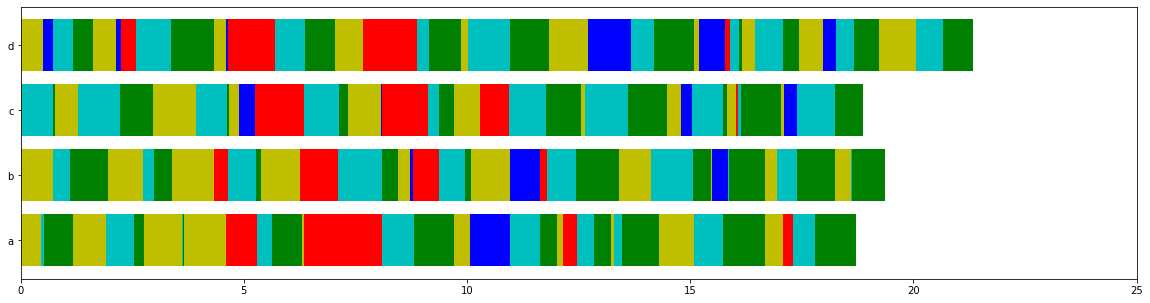

In [149]:
fig, ax = plt.subplots(figsize=(20, 5))
left_data = np.zeros(4)

label_color = {"hungry": 'y', "fork1":'b', "fork2":'r', "eating":'c', "thinking":'g'}
index = ["a", "b", "c", "d"]
for key, value in time_series.items():
    label = key.split(":")[-1]

    times = np.array([a_time[key], b_time[key], c_time[key], d_time[key]])
    bar_list = ax.barh(index, times, left = left_data, label=label, color = label_color[label])
    left_data += times
ax.set_xlim([0,25])


In [10]:

fork = Forks()
phi_a = Philosopher("a", [1, 2])
phi_b = Philosopher("b", [2, 3])
phi_c = Philosopher("c", [3, 4])
phi_d = Philosopher("d", [4, 1])

In [11]:
event = threading.Event()

In [12]:
thread_a = threading.Thread(target= phi_a.action, args=(fork, ))
thread_b = threading.Thread(target= phi_b.action, args=(fork, ))
thread_c = threading.Thread(target= phi_c.action, args=(fork, ))
thread_d = threading.Thread(target= phi_d.action, args=(fork, ))

In [13]:
thread_a.start()
thread_b.start()
thread_c.start()
thread_d.start()

a is hungry.
b is hungry.
c is hungry.
d is hungry.
b picks up 2.
b picks up 3.
b is eating.
d picks up 4.
d picks up 1.
d is eating.
b puts 3.
b puts 2.
b is thinking.
a picks up 2.
d puts 4.c picks up 4.
d puts 1.
d is thinking.
a picks up 1.
c picks up 3.
c is eating.

a is eating.
c puts 4.
c puts 3.
c is thinking.
b is hungry.
d is hungry.
a puts 1.d picks up 1.

d picks up 4.
d is eating.
a puts 2.
a is thinking.
b picks up 2.
b picks up 3.
b is eating.
d puts 4.
d puts 1.
d is thinking.
c is hungry.
a is hungry.
b puts 3.
b puts 2.
b is thinking.
a picks up 2.
a picks up 1.
a is eating.
c picks up 3.
c picks up 4.
c is eating.
c puts 3.
c puts 4.
c is thinking.
a puts 2.
a puts 1.
a is thinking.
